In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


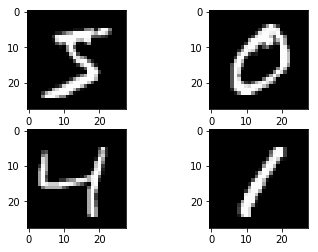

In [4]:
#plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0],  cmap='gray')
plt.subplot(222)
plt.imshow(X_train[1], cmap='gray')
plt.subplot(223)
plt.imshow(X_train[2],cmap='gray')
plt.subplot(224)
plt.imshow(X_train[3], cmap='gray')

## Aritificial Neural Networks Approach

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

Since this dataset is full of images and we need to convert this into the vector

In [8]:
#flatten 28*28 images into 784 vector
num_pixels = X_train.shape[1] * X_train.shape[2]

In [9]:
print(num_pixels)

784


In [11]:
X_train[1].shape

(28, 28)

We can see that the X_train is in shape of (28,28) and we need to convert it into (784,1)

In [14]:
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [15]:
X_train[1].shape

(784,)

we can see that the images are turned into a vector

In [16]:
#normalise
X_train = X_train/255
X_test = X_test/255

Since this is a multiclass classification problem and we need to one hot encode the label

In [17]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [19]:
y_test.shape

(10000, 10)

In [29]:
#model building
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units=784, input_dim=784, kernel_initializer='normal', activation='relu'))
    classifier.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))    
    classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return classifier

classifier_NN = build_classifier()

In [31]:
history = classifier_NN.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=200,
                  epochs=10, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 7s - loss: 0.2800 - acc: 0.9211 - val_loss: 0.1520 - val_acc: 0.9555
Epoch 2/10
 - 7s - loss: 0.1098 - acc: 0.9683 - val_loss: 0.0920 - val_acc: 0.9713
Epoch 3/10
 - 7s - loss: 0.0705 - acc: 0.9796 - val_loss: 0.0737 - val_acc: 0.9764
Epoch 4/10
 - 7s - loss: 0.0487 - acc: 0.9860 - val_loss: 0.0679 - val_acc: 0.9778
Epoch 5/10
 - 8s - loss: 0.0354 - acc: 0.9901 - val_loss: 0.0596 - val_acc: 0.9812
Epoch 6/10
 - 7s - loss: 0.0250 - acc: 0.9936 - val_loss: 0.0588 - val_acc: 0.9819
Epoch 7/10
 - 7s - loss: 0.0207 - acc: 0.9945 - val_loss: 0.0590 - val_acc: 0.9802
Epoch 8/10
 - 7s - loss: 0.0147 - acc: 0.9967 - val_loss: 0.0666 - val_acc: 0.9799
Epoch 9/10
 - 7s - loss: 0.0105 - acc: 0.9978 - val_loss: 0.0565 - val_acc: 0.9825
Epoch 10/10
 - 7s - loss: 0.0069 - acc: 0.9991 - val_loss: 0.0586 - val_acc: 0.9827


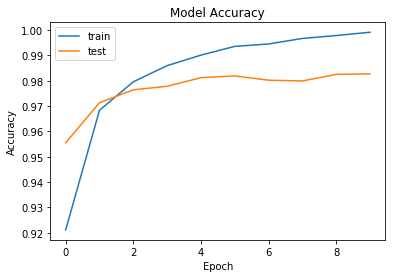

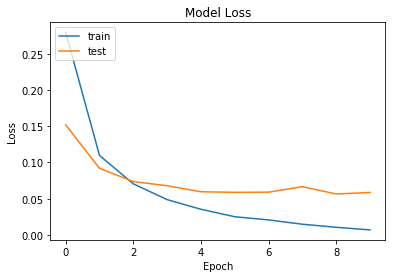

In [37]:
# evaluate the model
scores = classifier_NN.evaluate(X_test, y_test, verbose=0)

# history plot for accuracy
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "test"], loc="upper left")
plt.show()

# history plot for accuracy
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "test"], loc="upper left")
plt.show()

## Convolutional Neural Networks

In [23]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

In [34]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [35]:
X_train.shape

(60000, 28, 28)

In [36]:
img_rows = 28
img_cols = 28

In [40]:
#input shape
from keras import backend as K
if K.image_data_format() == 'channels_first':
  #reshape to be [samples][pixels][width][height]
    X_train = X_train.reshape(X_train.shape[0], 1 , img_rows, img_cols).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols).astype('float32') 
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1).astype('float32')
    input_shape = (img_rows, img_cols, 1)

In [41]:
#normalise
X_train = X_train/255
X_test = X_test/255

In [42]:
#one hot encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [43]:
def build_classifier():
    classifier = Sequential()
    classifier.add(Conv2D(30, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
    classifier.add(MaxPooling2D(pool_size=(2,2)))
    classifier.add(Conv2D(15, (5,5), activation='relu'))
    classifier.add(MaxPooling2D(pool_size=(2,2)))
    classifier.add(Flatten())
    classifier.add(Dense(128, activation='relu'))
    classifier.add(Dense(50, activation='relu'))
    classifier.add(Dense(10, activation='softmax'))
    classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return classifier

In [44]:
classifier_CNN = build_classifier()
classifier_CNN.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=200, epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 873s 15ms/step - loss: 0.3672 - acc: 0.8898 - val_loss: 0.0976 - val_acc: 0.9702
Epoch 2/10
60000/60000 [==============================] - 919s 15ms/step - loss: 0.0968 - acc: 0.9712 - val_loss: 0.0686 - val_acc: 0.9775
Epoch 3/10
60000/60000 [==============================] - 881s 15ms/step - loss: 0.0657 - acc: 0.9802 - val_loss: 0.0530 - val_acc: 0.9832
Epoch 4/10
60000/60000 [==============================] - 887s 15ms/step - loss: 0.0524 - acc: 0.9841 - val_loss: 0.0445 - val_acc: 0.9850
Epoch 5/10
60000/60000 [==============================] - 870s 15ms/step - loss: 0.0437 - acc: 0.9864 - val_loss: 0.0512 - val_acc: 0.9832
Epoch 6/10
60000/60000 [==============================] - 955s 16ms/step - loss: 0.0371 - acc: 0.9882 - val_loss: 0.0409 - val_acc: 0.9865
Epoch 7/10
60000/60000 [==============================] - 1078s 18ms/step - loss: 0.0320 - acc: 0.9901 - val_loss: 0

In [45]:
score = classifier_CNN.evaluate(X_test, y_test, verbose=2)

In [46]:
score

[0.040680805897590475, 0.987]

Now we have got the training accuracy 99% and validation accuracy 98% which is good as our classifier performs well.